In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler and fit on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Experiment with different values of K
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    # Initialize KNN with a specific K
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_scaled)

    # Evaluate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with K={k}: {accuracy:.4f}")

Accuracy with K=1: 0.9778
Accuracy with K=3: 1.0000
Accuracy with K=5: 1.0000
Accuracy with K=7: 1.0000
Accuracy with K=9: 1.0000


In [3]:
from sklearn.metrics import confusion_matrix, classification_report

# Let's assume K=5 was the best choice (a common starting point)
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)

# Generate and print the classification report
cr = classification_report(y_test, y_pred_best, target_names=iris.target_names)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



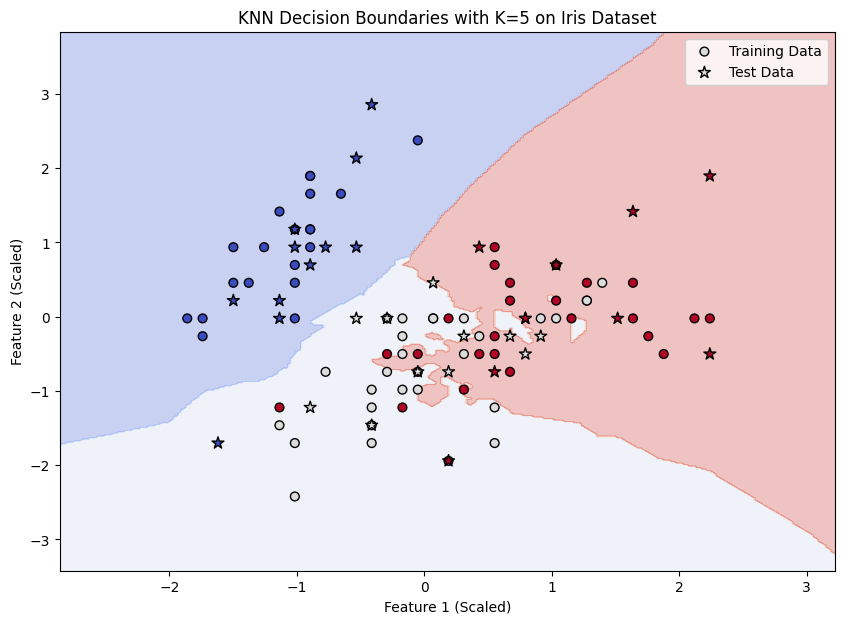

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Using the first two features for visualization
X_vis = X_train_scaled[:, :2]
y_vis = y_train

# Re-split and train on a 2D subset of the data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions on the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolor='k', s=40, label="Training Data")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=plt.cm.coolwarm, edgecolor='k', marker='*', s=80, label="Test Data")
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title(f'KNN Decision Boundaries with K=5 on Iris Dataset')
plt.legend()
plt.show()